<a href="https://colab.research.google.com/github/suajeong52/heaveMPM/blob/main/0501_mpm_6%EA%B3%BC_2_85mesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd

# dp1 ~ dp14 csv 파일과 draftdata2 csv 파일을 불러오기
for i in range(1, 15):
    globals()[f'dp{i}'] = pd.read_csv(f'dp{i}.csv')
    
draftdata2 = pd.read_csv('aqwa_draft.csv')

# m1 ~ m14 추출
for i in range(1, 15):
    globals()[f'm{i}'] = globals()[f'dp{i}'].iloc[:, 1:]

# Draftdata2 추출
Draftdata2 = draftdata2.iloc[:, 1]

# M1 ~ M14 생성
for i in range(1, 15):
    globals()[f'M{i}'] = globals()[f'm{i}'].iloc[:, :] + Draftdata2.iloc[i-1]


In [24]:
M1

,m
0,0.000000
1,-0.000013
2,-0.000057
3,-0.000138
4,-0.000262
...,...
4996,-0.010160
4997,-0.009953
4998,-0.009711
4999,-0.009441


In [25]:
M2

,m
0,0.000000
1,-0.000013
2,-0.000056
3,-0.000135
4,-0.000258
...,...
4996,0.022805
4997,0.023247
4998,0.023704
4999,0.024168


In [26]:
M7

,m
0,0.000000
1,-0.000014
2,-0.000062
3,-0.000151
4,-0.000286
...,...
4996,0.020253
4997,0.021229
4998,0.022229
4999,0.023245


In [27]:
M14

,m
0,0.000000
1,-0.000021
2,-0.000090
3,-0.000218
4,-0.000413
...,...
4996,0.030649
4997,0.031079
4998,0.031574
4999,0.032130


In [28]:
import numpy as np

In [29]:
for i in range(1, 15):
    locals()[f'M{i}'] = abs(locals()[f'M{i}'])


In [30]:

from scipy.signal import find_peaks
import matplotlib.pyplot as plt


In [31]:
M1

,m
0,0.000000
1,0.000013
2,0.000057
3,0.000138
4,0.000262
...,...
4996,0.010160
4997,0.009953
4998,0.009711
4999,0.009441


MAX1: [0.03387833 0.01753616 0.0288167  0.02096319 0.03111792 0.00461864
 0.03261375 0.02380037 0.0132947  0.02688313 0.03199434 0.01623106
 0.02043724 0.03016615 0.00405741 0.03202104 0.0279541  0.01803017
 0.0384841  0.00805759 0.00677729 0.03396559 0.02615547 0.00456858
 0.03636456 0.02482081 0.0268631  0.03573561 0.00112581 0.00338936
 0.0373168  0.02613592 0.03787327 0.04600286 0.00966311 0.00797748
 0.03918028 0.0007596  0.0170188  0.03587961 0.03909969 0.00747871
 0.0002594  0.03149223 0.03036499 0.02020788 0.01776838 0.02561379
 0.02603483 0.02437067 0.0158701  0.03565836 0.00625086 0.03269672
 0.03041077 0.03027534 0.02689266 0.02024126 0.04044437 0.00923443
 0.00754023 0.03900003 0.02043343 0.02828932 0.02433634 0.01656771
 0.03205347 0.02309275 0.02178288 0.03293991 0.00409555 0.00041771
 0.03355789 0.02736664 0.02138233 0.03769302 0.01027059 0.00430441
 0.04192305 0.0244174  0.01754809 0.03102398 0.00853777 0.03309441
 0.03312206 0.00828171 0.02569819 0.03374958 0.01641989 

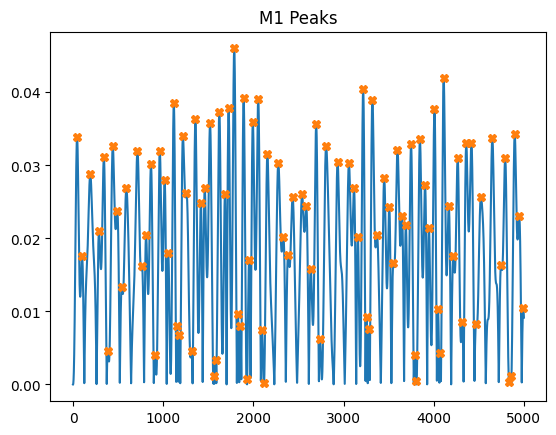

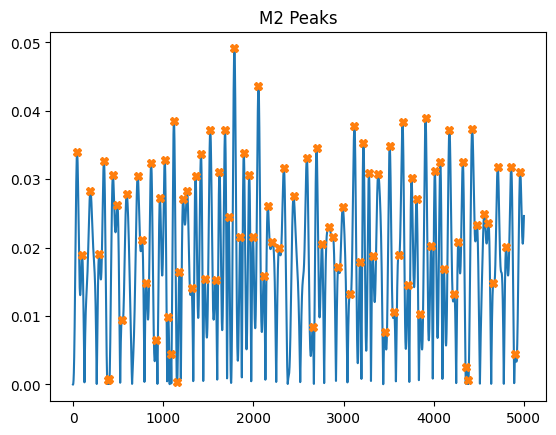

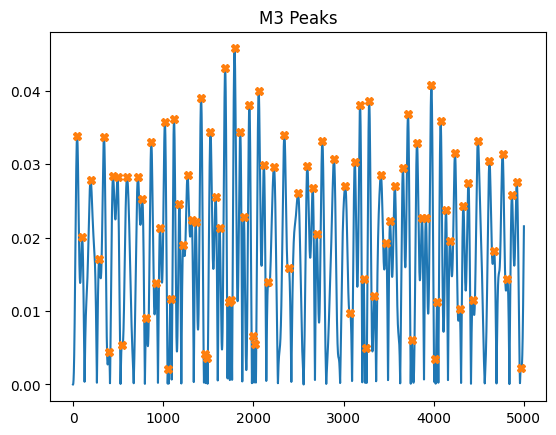

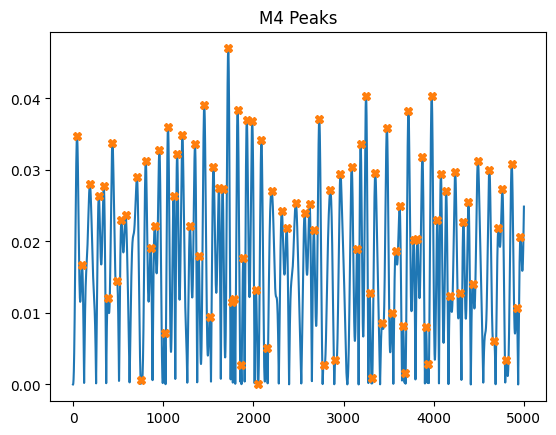

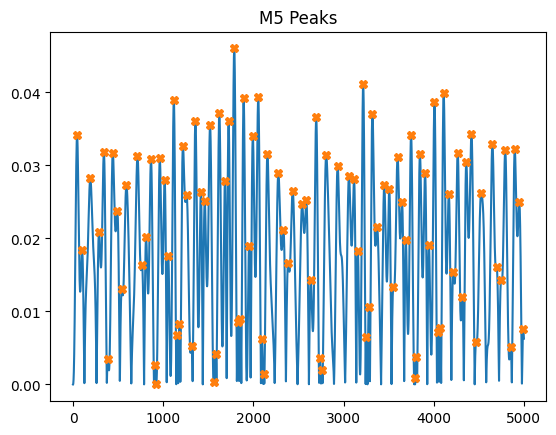

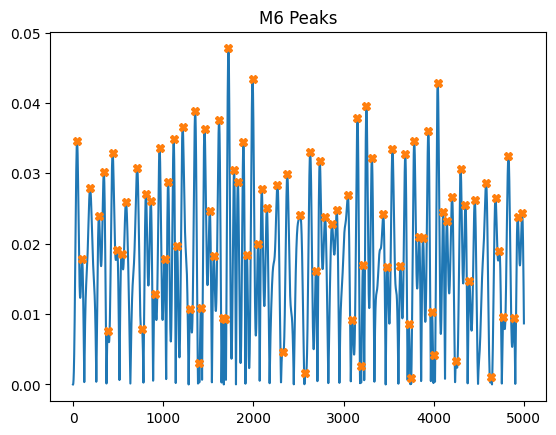

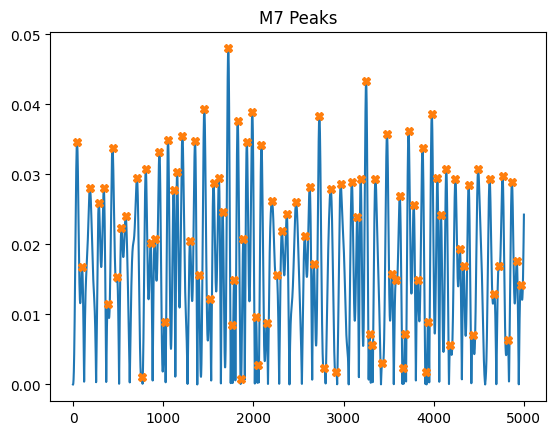

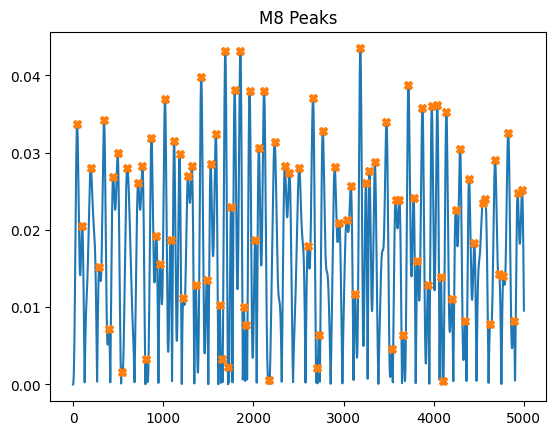

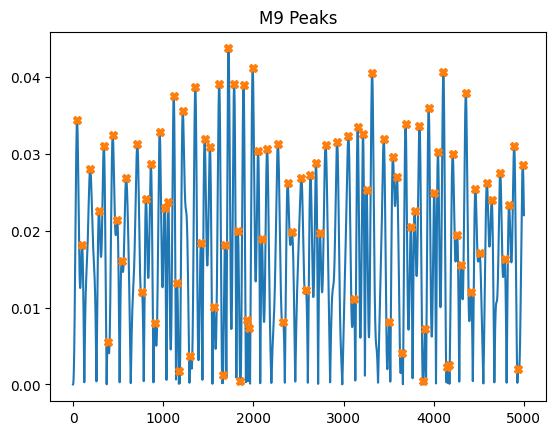

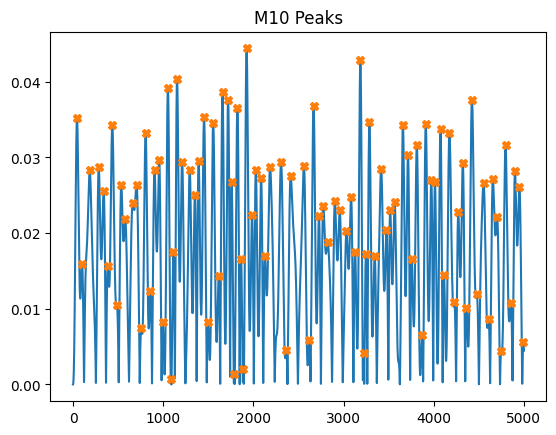

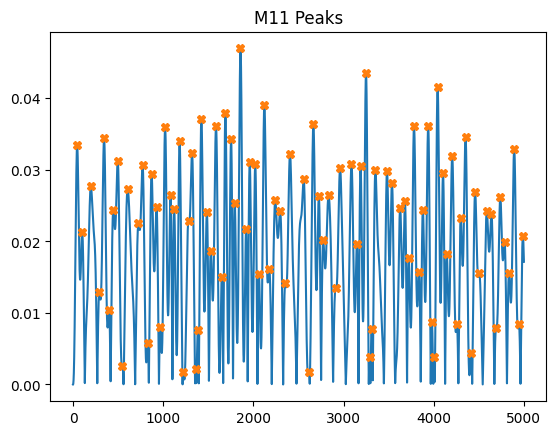

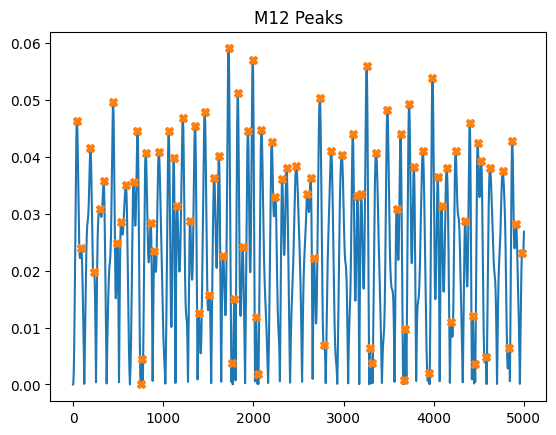

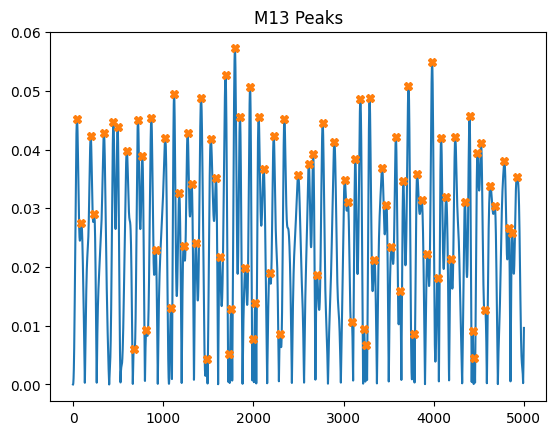

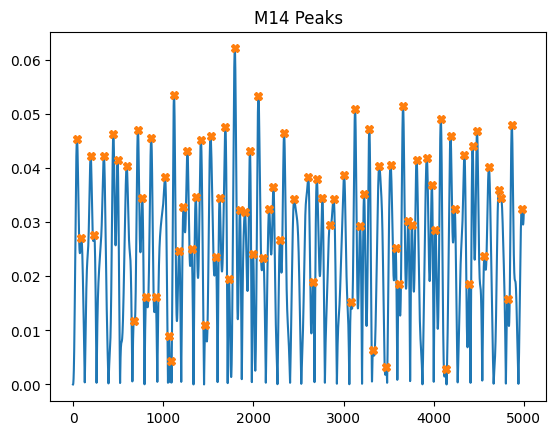

In [32]:
mpm_list = []
for i in range(1, 15):
    # find peaks
    peaks_i, properties_i = find_peaks(locals()[f'M{i}'].iloc[:, 0], height=0)

    # plot peaks
    plt.figure()
    plt.plot(locals()[f'M{i}'])
    plt.plot(peaks_i, locals()[f'M{i}'].iloc[:, 0][peaks_i], "X")
    plt.title(f'M{i} Peaks')

    # calculate MPM
    MAX_i = properties_i["peak_heights"]
    print(f'MAX{i}: {MAX_i}')

    sorted_index_array = np.argsort(MAX_i)
    sorted_array = MAX_i[sorted_index_array]

    n=20
    MAX_r_i = sorted_array[-n:]

    print(f'Top {n} MAX values for M{i}: {MAX_r_i}')

    t2 = 6.5
    p = 0.37
    sigma_i = np.std(MAX_r_i)
    mean_i = np.mean(MAX_r_i)
    gamma = 0.577
    beta_i = (np.sqrt(6) / np.pi) * sigma_i
    mu_i = mean_i - ((np.sqrt(6) / np.pi) * sigma_i * gamma)
    l = -np.log(p)
    MPM_i = -np.log(l) * beta_i + mu_i
    mpm_list.append(MPM_i)
    print(f'MPM{i}: {MPM_i}')


In [33]:
print(mpm_list)

[0.03574270674867758, 0.034886551978631254, 0.035346595611693676, 0.03481306044842712, 0.03533608955787941, 0.03489569288878725, 0.03459541390178059, 0.0354607136212292, 0.03519386490132869, 0.03499794630392411, 0.03466533287797257, 0.046672303235693144, 0.0460833083066106, 0.046389213491669]
